In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Transit times are a linear combination of basis functions
The time of the $n$th transit of a planet perturbed by another planet with mass $\mu'$ can be approximated as
$$t(n) = T_0 + nP + \mu' \delta t^{(0)}(n) + \mu'\text{Re}[{\cal Z}]\delta t^{(1,x)}(n)+ \mu'\text{Im}[{\cal Z}]\delta t^{(1,y)}(n)$$
where  $t^{(0)}(n)$, $t^{(1,x)}(n)$, and $t^{(1,y)}(n)$ depend on planets' periods and initial orbital phase
and $${\cal Z}\approx \frac{e'\exp[i\varpi']-e\exp[i\varpi]}{\sqrt 2}$$

This can be written as a matrix equation
$$t_i = M_{ij} X_j$$
where 
$$M = \begin{pmatrix} 1 & 0 & \delta t^{(0)}(0) &t^{(1,x)}(0) & t^{(1,y)}(0)\\
                     1 & 1 & \delta t^{(0)}(1) & t^{(1,x)}(1) & t^{(1,y)}(1)\\
                     ...\\
                      1 & i & \delta t^{(0)}(i) & t^{(1,x)}(i)&t^{(1,y)}(i)\\
                      ...
     \end{pmatrix}
 $$
 and 
 $$ X = \begin{pmatrix} T_0 & P & \mu' & \mu'\text{Re}[{\cal Z}] &\mu'\text{Im}[{\cal Z}]\end{pmatrix}^{T} $$ 



## The matrix $M$ and vector $X$ can be computed with some function defined in "ttv2fast2furious".

In [2]:
from ttv2fast2furious import ttv_basis_function_matrix_inner,ttv_basis_function_matrix_outer
from ttv2fast2furious import PlanetPropertiestoLinearModelAmplitudes

In [3]:
m,m1 = 1.e-5,1.e-5 # masses, in solar masses
P =  2 # inner planet period
P1= (3/2.)*(1+0.02)*P # outer planet period

tfin=150. * P # get transit times from 0 to tfin
e,e1 = 0.03,0.02 # eccentricities
varpi,varpi1 = np.random.uniform(0,2*np.pi,2)
T0, T10 = 1.3, 1.9 # initial times of transit
Ntransits= 100 # number of transits to compute
Ntransits1=int(round(P*Ntransits/P1))

In [4]:
M=ttv_basis_function_matrix_inner(P,P1,T0,T10,Ntransits)
M1=ttv_basis_function_matrix_outer(P,P1,T0,T10,Ntransits1)
X,X1=PlanetPropertiestoLinearModelAmplitudes(T0,P,m,e,varpi,T10,P1,m1,e1,varpi1)

## Here is an 2-planet example system
Quanties for outer planet are folled by a '1' (my hacky way of writing a " ' " for code variables)

In [5]:
m,m1 = 1.e-5,1.e-5 # masses, in solar masses
P =  2 # inner planet period
P1= (3/2.)*(1+0.02)*P # outer planet period

tfin=150. * P # get transit times from 0 to tfin
e,e1 = 0.03,0.02 # eccentricities
varpi,varpi1 = np.random.uniform(0,2*np.pi,2)
T0, T10 = 1.3, 1.9 # initial times of transit
Ntransits= 100 # number of transits to compute
Ntransits1=int(round(P*Ntransits/P1))

In [6]:
M=ttv_basis_function_matrix_inner(P,P1,T0,T10,Ntransits)
M1=ttv_basis_function_matrix_outer(P,P1,T0,T10,Ntransits1)
X,X1=PlanetPropertiestoLinearModelAmplitudes(T0,P,m,e,varpi,T10,P1,m1,e1,varpi1)

print(M.shape,M1.shape)
print(X.shape,X1.shape)

(100, 5) (65, 5)
(5,) (5,)


## Plot the predicted TTVs versus transit times

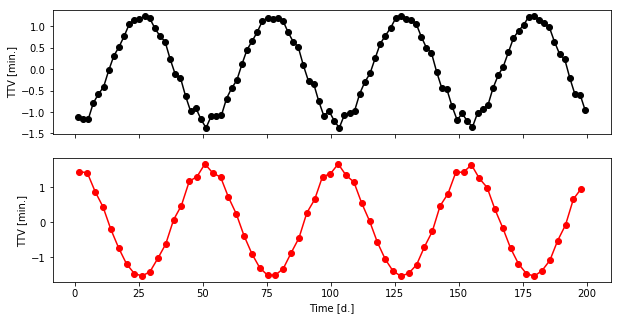

In [7]:
TransitTimes = M.dot(X)
TTV = M[:,2:].dot(X[2:])

TransitTimes1 = M1.dot(X1)
TTV1 = M1[:,2:].dot(X1[2:])


fig,ax=plt.subplots(2,1,sharex=True,figsize=(10,5))
ax[0].plot(TransitTimes,24*60*TTV,'ko-')
ax[1].plot(TransitTimes1,24*60*TTV1,'ro-')
ax[1].set_xlabel("Time [d.]")

ax[0].set_ylabel("TTV [min.]")
ax[1].set_ylabel("TTV [min.]")


# Example fit of Kepler-307 (see HL16 as well as Lininal '18)

## "ttv2fast2furious" defines objects that represent transit time observations and a collection linear models for a single system


In [8]:
from ttv2fast2furious import PlanetTransitObservations
from ttv2fast2furious import TransitTimesLinearModels

## Read in transit time data for the Kepler-307 system and save as 'PlanetTransitObservations' objects

In [9]:
import pandas as pd
kepler307data = pd.read_csv("./Kepler-307_transit_times.csv")

print(kepler307data.columns)

def dataframe_to_TransitObservations(dframe):
    tr_num = dframe.TransitNumber.values
    tr_time = dframe.TransitTime.values
    tr_unc = dframe.eTTV.values
    return PlanetTransitObservations(tr_num,tr_time,tr_unc)

observations = kepler307data.groupby('Planet_Number').apply(dataframe_to_TransitObservations).values.tolist()

for i,obs in enumerate(observations):
    T0,period=obs.linear_best_fit()
    print("Period_%d: %.4f \t T0_%d: %.4f"%(i,period,i,T0))

Index(['Unnamed: 0', 'KOI', 'TransitNumber', 'TransitTimeLinear', 'TTV',
       'eTTV', 'TransitTime', 'KOI_System', 'Planet_Number'],
      dtype='object')
Period_0: 10.4157 	 T0_0: 55.2148
Period_1: 13.0842 	 T0_1: 52.5462
Period_2: 23.3402 	 T0_2: 56.0132


/Users/shadden/Dropbox (Smithsonian External)/TTV2Fast2Furious/ttv2fast2furious.py:309: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fitresults = np.linalg.lstsq(A,y)


## Fit TTVs of Kepler 307 b and c

Generate a collection of linear models for the planetary system.
- 'maximum_interaction_period_ratio' sets the maximum spacing for which to consider planet-planet interactions. In this case, we have set it to 1.7 so that interactions between Kepler-307 c and candidate planet 1576.03 are ingored.
- The 'update_fits' method generates new TTV basis functions using the current best-fit period and intitial transit times. 'update_fits' can repeated to converge on best-fit mean periods and $T_0$s, re-fitting with updated TTV basis functions at each stage.

In [10]:
linear_models = TransitTimesLinearModels(observations)
linear_models.maximum_interaction_period_ratio=1.7
for _ in range(2):
    linear_models.update_fits()


/Users/shadden/Dropbox (Smithsonian External)/TTV2Fast2Furious/ttv2fast2furious.py:309: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fitresults = np.linalg.lstsq(A,y)
/Users/shadden/Dropbox (Smithsonian External)/TTV2Fast2Furious/ttv2fast2furious.py:403: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return [np.linalg.lstsq(A[i],y[i])[0] for i in range(self.N)]


Best fit perturber mass: 1.20 (+/- 0.36 ) x 10^-5
Best fit perturber mass: 2.79 (+/- 0.45 ) x 10^-5


/Users/shadden/Dropbox (Smithsonian External)/TTV2Fast2Furious/ttv2fast2furious.py:403: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return [np.linalg.lstsq(A[i],y[i])[0] for i in range(self.N)]


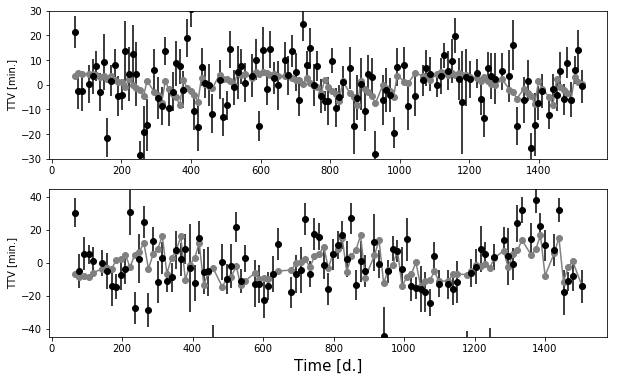

In [11]:
fig,ax = plt.subplots(2,figsize=(10,6))
day2min = 24*60
for i in range(2):
    obs = linear_models.observations[i]
    X = linear_models.best_fits[i]
    M = linear_models.basis_function_matrices[i]
    Sigma = linear_models.covariance_matrices[i]
    
    e_mu = np.sqrt(Sigma[2,2])
    transit_times = obs.times
    unc = day2min * obs.uncertainties
    TTVobs = day2min * (obs.times - M[:,:2].dot(X[:2]))
    TTVcalc = day2min * (M[:,2:].dot(X[2:]))
    
    
    ax[i].errorbar(transit_times,TTVobs,fmt='ko',yerr=unc)
    ax[i].plot(transit_times,TTVcalc,'-o',color='gray')
    ax[i].set_ylabel('TTV [min.]')
    
    print("Best fit perturber mass: %.2f (+/- %.2f ) x 10^-5"%(1e5 * X[2],1e5 * e_mu))
ax[0].set_ylim(-30,30)
ax[1].set_ylim(-45,45)

ax[1].set_xlabel('Time [d.]',fontsize=15)


# Equation 4 can be used to make contours in $\mu$ vs $Z$ from each planet's best fit 

In [12]:
from scipy.integrate import quad

def chi_squared(mu,Zx,Zy,best,Sigma):
    x=np.array([mu,mu*Zx,mu*Zy])
    dx = x-best
    SigmaInv = np.linalg.inv(Sigma)
    return dx.dot(SigmaInv.dot(dx))

def transformed_likelihood(argZ,mu,absZ,best,Sigma):
    Zx = absZ * np.cos(argZ)
    Zy = absZ * np.sin(argZ)
    return mu * mu * absZ * np.exp( -0.5 * chi_squared(mu,Zx,Zy,best,Sigma) )

def integrated_likelihood(mu,absZ,best,Sigma):
    integrand = lambda x: transformed_likelihood(x,mu,absZ,best,Sigma)
    return quad(integrand,0,2*np.pi)[0]


/Users/shadden/Dropbox (Smithsonian External)/TTV2Fast2Furious/ttv2fast2furious.py:403: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return [np.linalg.lstsq(A[i],y[i])[0] for i in range(self.N)]


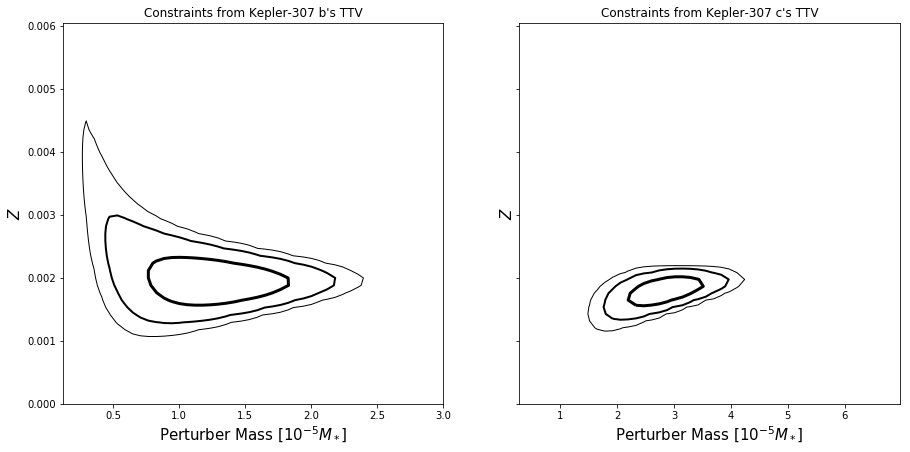

In [13]:
from rebound.interruptible_pool import InterruptiblePool
# pool = InterruptiblePool()
fig,axes = plt.subplots(1,2,figsize =(15,7),sharey=True)

SCALE = 1e5
Ngrid = 50

for i,ax in enumerate(axes):
    best = linear_models.best_fits[i][2:] * SCALE
    Sigma = linear_models.covariance_matrices[i][2:,2:] * SCALE * SCALE



    mu_best = best[0]
    Z_best = np.sqrt(best[1:].dot(best[1:]))/best[0]
    murange = np.linspace(0.1 * mu_best , 2.5 * mu_best,Ngrid)
    zvals = np.linspace(0,3 * Z_best,Ngrid)

    pars=[]
    for zabs in zvals:
        for mu in murange:
            pars.append((mu ,zabs ))
    def fn(x): 
        return integrated_likelihood(x[0],x[1],best,Sigma)

    results = list(map(fn,pars))
    results2d = np.array(results).reshape(Ngrid,Ngrid)
    extent = [ np.min(murange), np.max(murange),min(zvals),max(zvals)]
    h=[]
    for q in [1-0.99,1-0.95,1-0.683]:
        ivmin=np.sum(np.cumsum(np.sort(results))/np.sum(results)>q)
        vmin=np.sort(results)[-ivmin]
        h.append(vmin)

    ax.contour( murange,zvals,results2d,h,colors=['black' for _ in h],linewidths=[n+1 for n in range(len(h))])

    ivmin=np.sum(np.cumsum(np.sort(results))/np.sum(results)>0.001)
    vmin=np.sort(results)[-ivmin]

    ax.set_xlabel('Perturber Mass [$10^{-5}M_*$]',fontsize=15)
    ax.set_ylabel('$Z$',fontsize=15)
    ax.set_title("Constraints from Kepler-307 %s's TTV"%('bc'[i]))

# The TTV framework is not limited to 2-planet systems; here is a 3-planet example

In [14]:
m1,m2,m3 = 2.e-5,2.e-5,3.e-5 # masses, in solar masses
P1 =  2 # inner planet period
P2= (3/2.)*(1+0.02)*P1 # outer planet period
P3= (3/2.)*(1-0.025)*P2 # outer planet period
tfin=150. * P1 # get transit times from 0 to tfin
e1,e2,e3 = 0.03,0.02,0.04 # eccentricities
varpi1,varpi2,varpi3 = np.random.uniform(0,2*np.pi,3)
T01, T02, T03 = 1.3, 1.9, 3.1 # initial times of transit
Ntransits1= 100 # number of transits to compute
Ntransits2=int(round(P1*Ntransits1/P2))
Ntransits3=int(round(P1*Ntransits1/P3))

Periods=[P1,P2,P3]
T0s=[T01, T02, T03]
Ntransits=[Ntransits1,Ntransits2,Ntransits3]
masses=[m1,m2,m3]
eccs=[e1,e2,e3]
varpis=[varpi1,varpi2,varpi3]


In [15]:
from ttv2fast2furious import MultiplanetSystemBasisFunctionMatrices
from ttv2fast2furious import MultiplanetSystemLinearModelAmplitudes


In [16]:
IMtrx=np.ones((3,3),dtype=bool)
#IMtrx[1,0]=0
M1,M2,M3=MultiplanetSystemBasisFunctionMatrices(3,Periods,T0s,Ntransits,InteractionMatrix=IMtrx)
X1,X2,X3=MultiplanetSystemLinearModelAmplitudes(3,Periods,T0s,masses,eccs,varpis,InteractionMatrix=IMtrx)

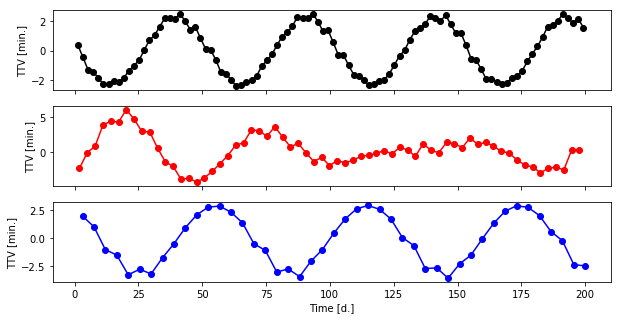

In [17]:
TransitTimes1 = M1.dot(X1)
TTV1 = M1[:,2:].dot(X1[2:])

TransitTimes2 = M2.dot(X2)
TTV2 = M2[:,2:].dot(X2[2:])

TransitTimes3 = M3.dot(X3)
TTV3 = M3[:,2:].dot(X3[2:])

fig,ax=plt.subplots(3,1,sharex=True,figsize=(10,5))
ax[0].plot(TransitTimes1,24*60*TTV1,'ko-')
ax[1].plot(TransitTimes2,24*60*TTV2,'ro-')
ax[2].plot(TransitTimes3,24*60*TTV3,'bo-')



ax[0].set_ylabel("TTV [min.]")
ax[1].set_ylabel("TTV [min.]")
ax[2].set_ylabel("TTV [min.]")


ax[2].set_xlabel("Time [d.]")



# Here is the same 3-planet example compared with N-body

## you can clone PyTTVFast from https://github.com/shadden/PyTTVFast
## just go into the directory, 'make', and make sure to insert the install directory in python's path (sys.path.insert below)

In [18]:
TTVFASTPATH='/Users/shadden/Projects/03_TESS_TTV/PyTTVFast'
# ^ Change to install directory of PyTTVFast

import sys
sys.path.insert(0, TTVFASTPATH)

import PyTTVFast
ttv=PyTTVFast.TTVCompute()

RAD2DEG=180/np.pi
NBvarpis = np.mod(np.array(varpis) * RAD2DEG + 90.0,360.0)
MVals = np.mod((-2*np.pi * np.array(T0s) / np.array(Periods)) * RAD2DEG + 90.0 - NBvarpis , 360)
params=np.vstack((masses,Periods,np.array(eccs),90*np.ones(3),np.zeros(3),NBvarpis,MVals)).T
times,success=ttv.TransitTimes(tfin,params)


On Quest...


/Users/shadden/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


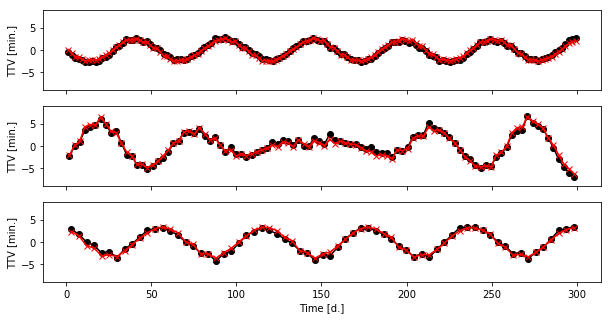

In [19]:
NBPeriods,NBT0s=np.array(list(map(lambda x: np.polyfit(np.arange(len(x)),x,1),times))).T
Ntransits = [len(t) for t in times]
Niter=1
for k in range(Niter):
    M=MultiplanetSystemBasisFunctionMatrices(3,NBPeriods,NBT0s,Ntransits,InteractionMatrix=IMtrx)
    solns=np.array([np.linalg.lstsq(M[i],times[i])[0] for i in range(3)])
    NBT0s,NBPeriods = solns.T[:2]
      
fig,ax=plt.subplots(3,1,sharex=True,figsize=(10,5))
for i in range(3):
    Ni = np.arange(len(times[i]))
    TTVi = times[i]-NBPeriods[i]*Ni-NBT0s[i]
    Atimesi = M[i].dot(solns[i])
    ATTVi = M[i][:,2:].dot(solns[i][2:])
    
    ax[i].plot(times[i],24*60*(TTVi),'ko-')
    ax[i].plot(Atimesi,24*60*(ATTVi),'rx-')
    
    ax[i].set_ylabel("TTV [min.]")
    ax[i].set_ylim(-9,9)

ax[2].set_xlabel("Time [d.]")

